In [2]:
import pandas as pd
from IPython.display import display


df = pd.read_csv("C:/Users/bruno.santos/OneDrive - Moovi Comunicação e meios de pagamento EIRELI/Área de Trabalho/GameInsights-ETL/processed_data.csv")
#display(df)

df['data_lancamento'] = pd.to_datetime(df['data_lancamento'], format='%d-%m-%Y' , errors='coerce')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0.1     18625 non-null  int64         
 1   Unnamed: 0       18625 non-null  int64         
 2   score_phrase     18625 non-null  object        
 3   title            18625 non-null  object        
 4   url              18624 non-null  object        
 5   platform         18624 non-null  object        
 6   score            18624 non-null  float64       
 7   genre            18588 non-null  object        
 8   editors_choice   18624 non-null  object        
 9   data_lancamento  0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 1.4+ MB
None



**Qual é a distribuição de jogos por gênero?**

C:\Users\bruno.santos\AppData\Local\Temp\ipykernel_14444\786065774.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_genres, y='genre', order=df_top_genres['genre'].value_counts().index, palette='viridis')


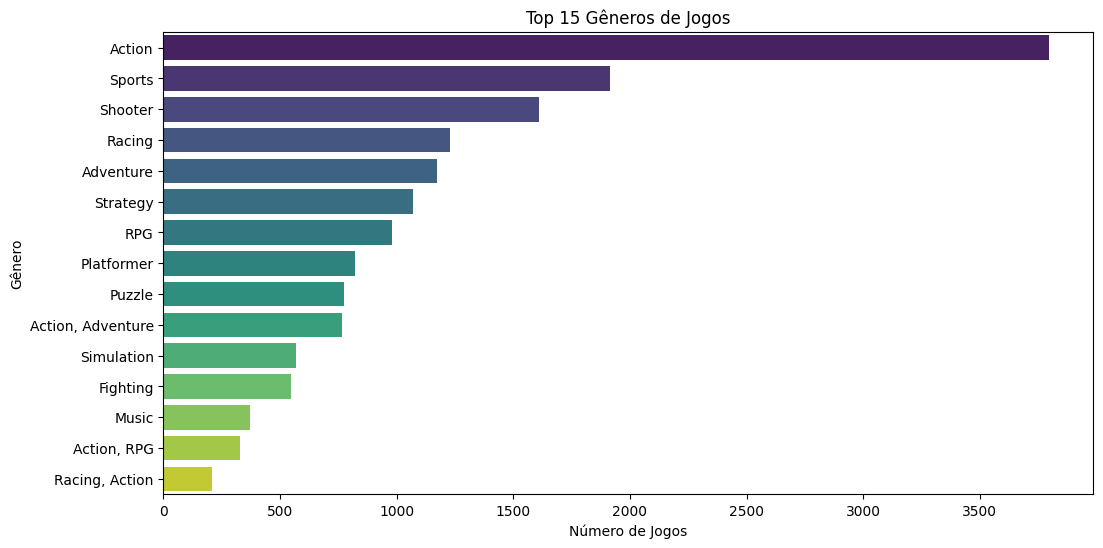

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n_genres = 15
top_genres = df['genre'].value_counts().nlargest(top_n_genres).index
df_top_genres = df[df['genre'].isin(top_genres)]

df_top_genres.loc[~df_top_genres['genre'].isin(top_genres), 'genre'] = 'Outros'

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_genres, y='genre', order=df_top_genres['genre'].value_counts().index, palette='viridis')
plt.title(f'Top {top_n_genres} Gêneros de Jogos')
plt.xlabel('Número de Jogos')
plt.ylabel('Gênero')
plt.show()



**Quais os jogos com as pontuações mais altas ?**

                                         title  score
1058      The Legend of Zelda: Ocarina of Time   10.0
1287                      Pokemon Blue Version   10.0
1289                       Pokemon Red Version   10.0
1354                                     Joust   10.0
1363                                  Shanghai   10.0
1408                            Checkered Flag   10.0
1434                  Super Mario Bros. Deluxe   10.0
1457                               Soulcalibur   10.0
1461  The Legend of Zelda: Link's Awakening DX   10.0
1592               Mario Golf [Game Boy Color]   10.0
1672   Pokemon Yellow: Special Pikachu Edition   10.0
1794      Sonic The Hedgehog: Pocket Adventure   10.0
1927   SNK vs. Capcom: Match of the Millennium   10.0
2008                  Magical Tetris Challenge   10.0
2174                   Metal Gear Solid [2000]   10.0


C:\Users\bruno.santos\AppData\Local\Temp\ipykernel_14444\2166046701.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_games, x='score', y='title', palette='viridis')


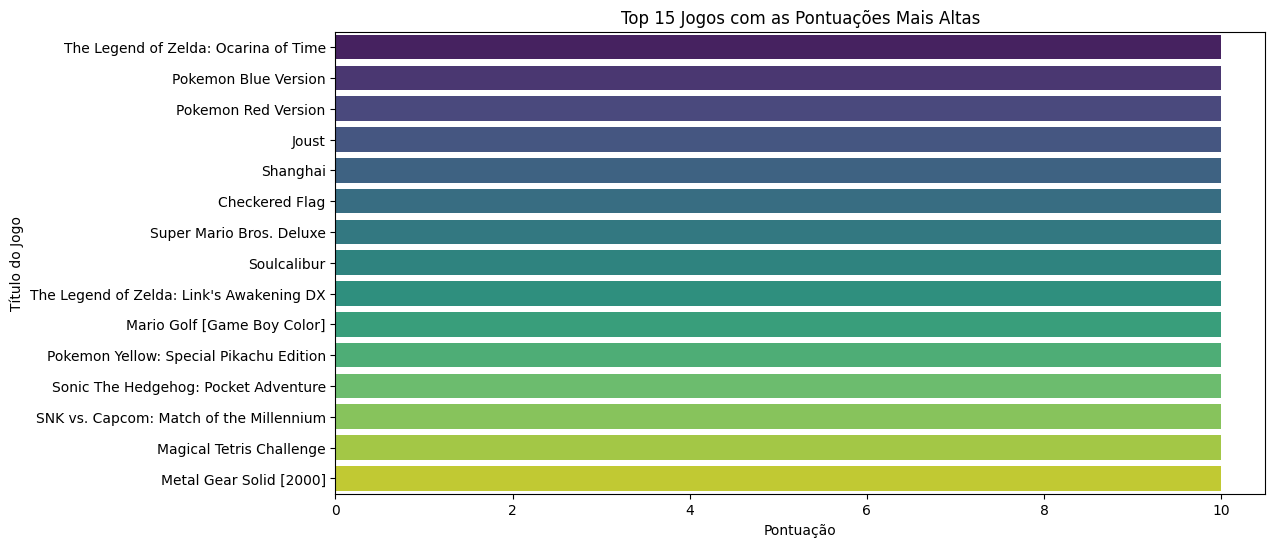

In [4]:
top_n_games = 15
top_games = df.nlargest(top_n_games, 'score')

print(top_games[['title', 'score']])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_games, x='score', y='title', palette='viridis')
plt.title(f'Top {top_n_games} Jogos com as Pontuações Mais Altas')
plt.xlabel('Pontuação')
plt.ylabel('Título do Jogo')
plt.show()


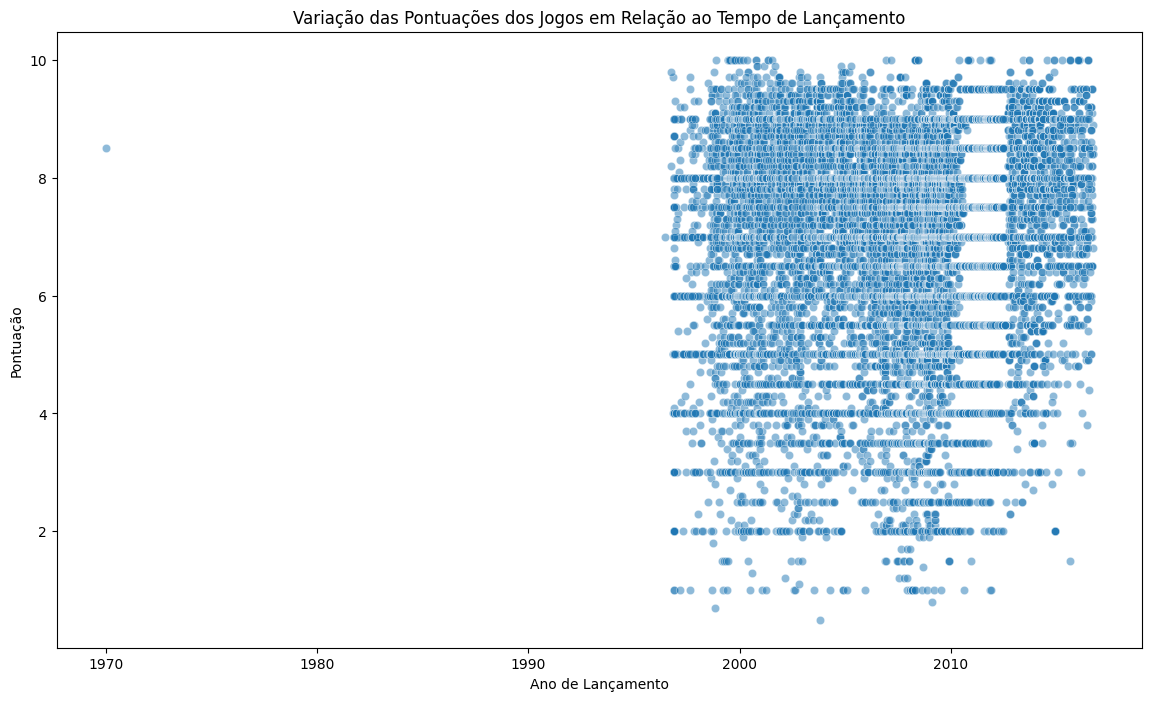

In [9]:
df = pd.read_csv("C:/Users/bruno.santos/OneDrive - Moovi Comunicação e meios de pagamento EIRELI/Área de Trabalho/GameInsights-ETL/processed_data.csv")
df['data_lancamento'] = pd.to_datetime(df['data_lancamento'], errors='coerce')

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='data_lancamento', y='score', alpha=0.5)
plt.title('Variação das Pontuações dos Jogos em Relação ao Tempo de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Pontuação')
plt.show()




**Pontuações dos jogos ao longo do tempo**

C:\Users\bruno.santos\AppData\Local\Temp\ipykernel_14444\399162550.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='data_lancamento', y='score', ci=None)


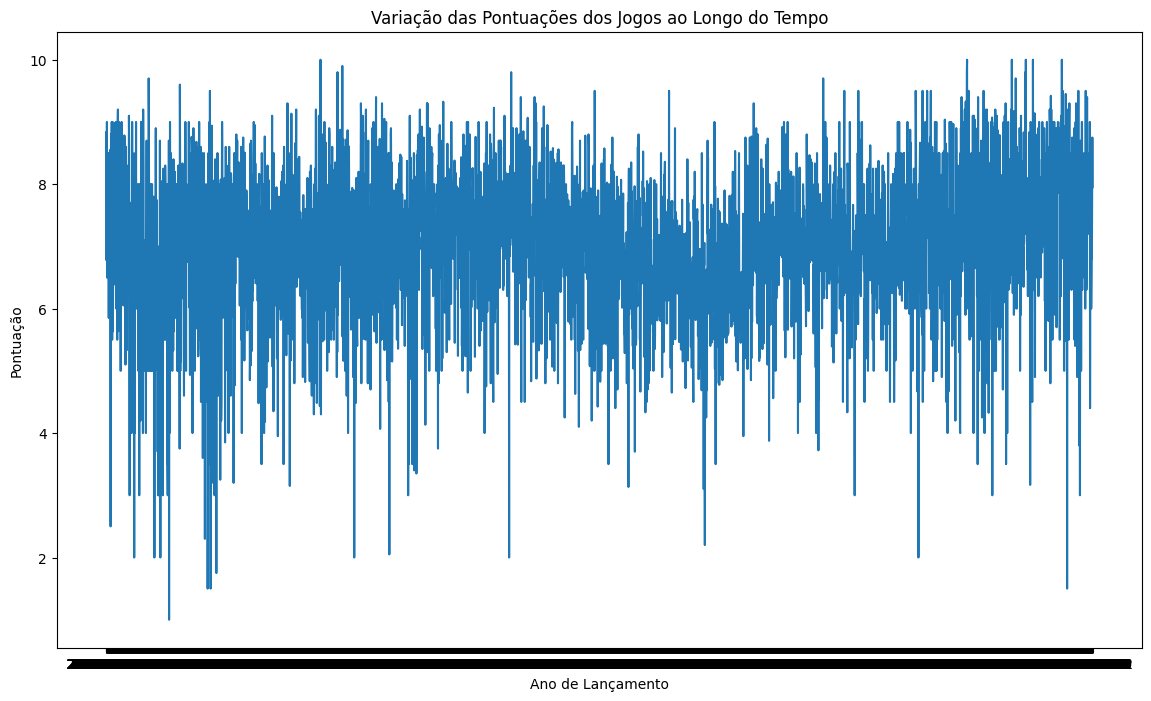

In [8]:
df = pd.read_csv("C:/Users/bruno.santos/OneDrive - Moovi Comunicação e meios de pagamento EIRELI/Área de Trabalho/GameInsights-ETL/processed_data.csv")
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='data_lancamento', y='score', ci=None)
plt.title('Variação das Pontuações dos Jogos ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Pontuação')
plt.show()
